## Machine Learning for Neuroscience, <br>Department of Brain Sciences, Faculty of Medicine, <br> Imperial College London
### Contributors: Francesca Palermo, Nan Fletcher-Lloyd, Alex Capstick, Yu Chen
**Winter 2022**

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay

## Task 1: Linear Regression

This task aims to train one or more linear regression models using [Diabetes dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset). Please click to see descriptive information about this dataset. We will provide instructions and example code step by step for you.

### Step 1: Load the dataset, split to training and test sets, train one or more linear models on the training data, and evaluate the performance

In [2]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()
diabetes_X, diabetes_y = diabetes.data, diabetes.target

In [3]:
## Split training and test set first ##
## In this example, test set is 10% samples of the whole dataset. ##
## You could change the training and test size and see the difference in model performance ##
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(
    diabetes_X, diabetes_y, test_size=0.1, random_state=42
)

In [4]:
## Create a linear regression model ##
## This example code only trains a vanialla linear regression model with least square error. ##
regr = linear_model.LinearRegression()

### Please try other linear models as well, such as Ridge, Lasso, useful information can be found [here](https://scikit-learn.org/stable/modules/linear_model.html#linear-model).

In [5]:
## Create some other linear model here to replace the above one ##





In [6]:
## Train the model using all features ##
regr.fit(diabetes_X_train, diabetes_y_train)

## Make predictions using the testing set ##
diabetes_y_pred = regr.predict(diabetes_X_test)

In [7]:
## Evaluate the predictions of above model ##
## You could add more metrics here, such as mean absolute error ##

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))
# Add other metrics you are interesed below:



Coefficients: 
 [  19.92730105 -262.5526422   509.19584695  336.09319329 -849.30479304
  480.22664735  120.69064852  236.72228404  716.61278802   70.41001991]
Mean squared error: 2743.91
Coefficient of determination: 0.55


### Step 2: Try to visualize and get some insights of the features 

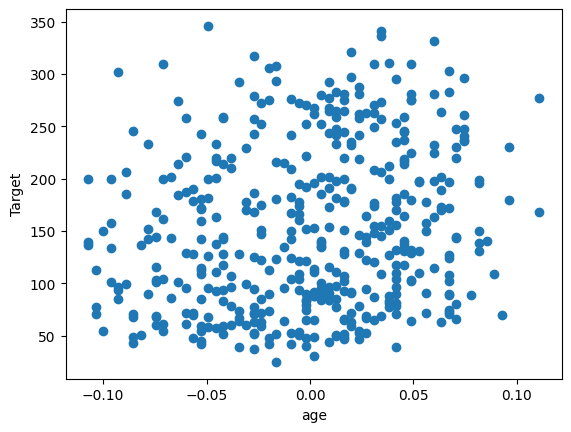

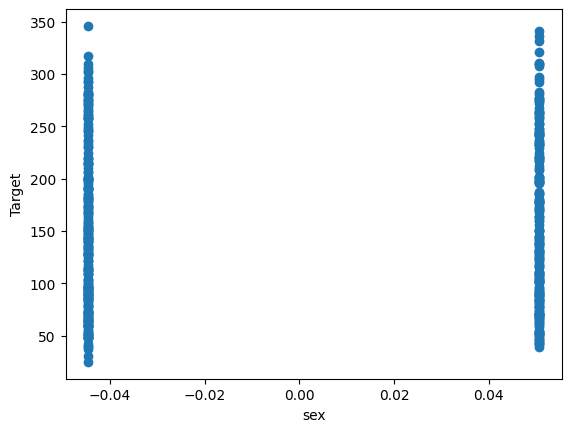

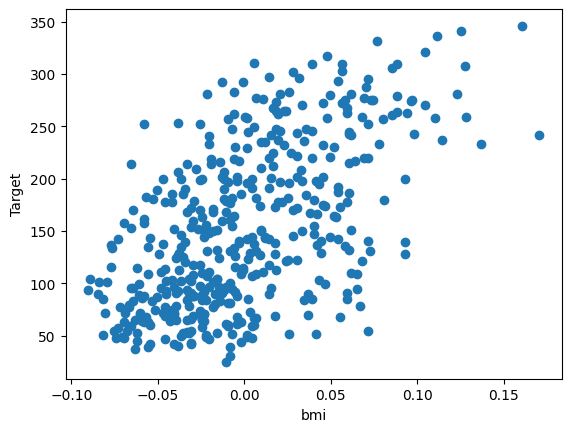

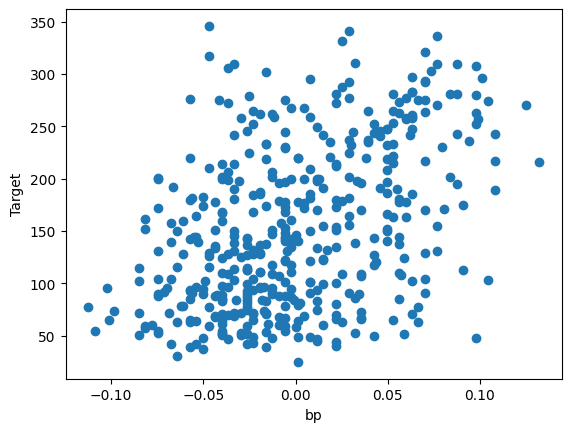

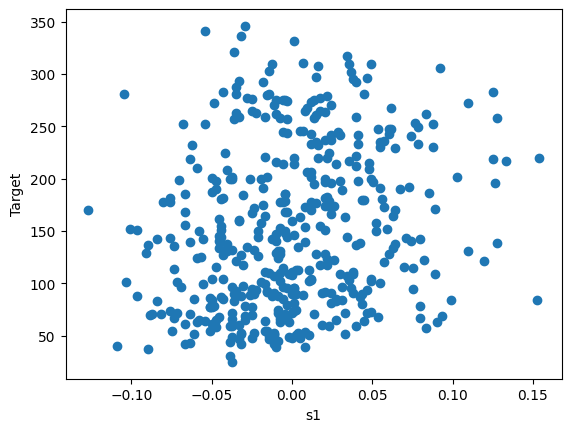

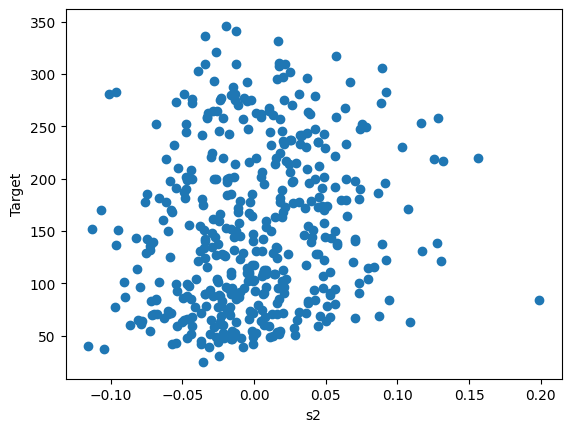

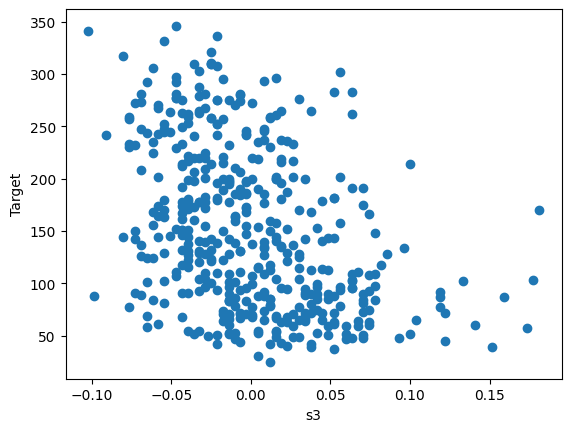

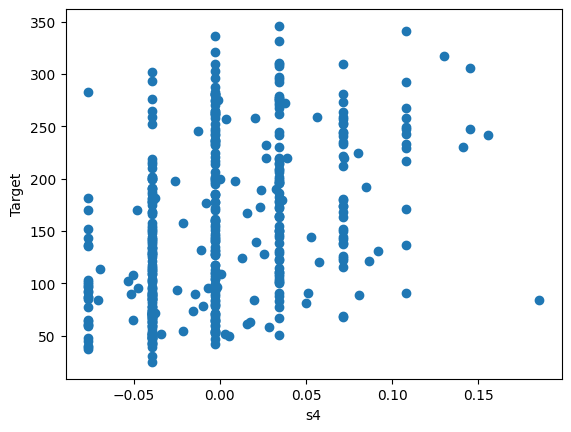

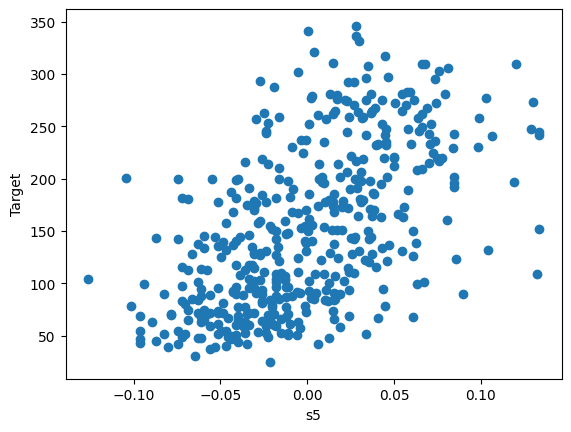

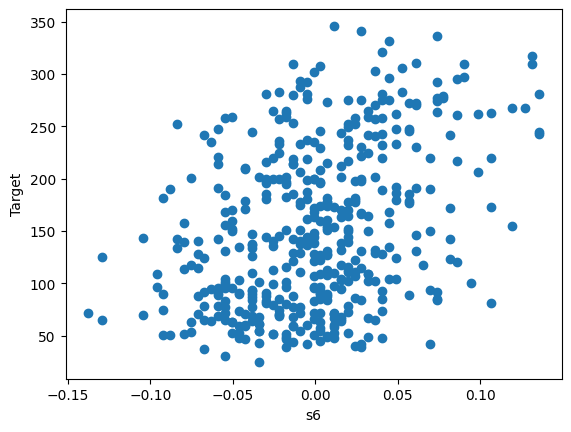

In [8]:
## This example code display a 2D scatter figure for each feature and the target value ##

for i in range(diabetes_X.shape[1]):
    plt.scatter(diabetes_X[:,i],diabetes_y)
    plt.xlabel(diabetes.feature_names[i])
    plt.ylabel('Target')
    plt.show()
    plt.close()

In [9]:
## Please enter your own visualization code here. ##
## For example, you could try to plot the histgram of each feature ## 
## Find how to plot histgram here: https://matplotlib.org/stable/gallery/statistics/hist.html ## 







### Step 2: According to above results, select one or more features to train the linear model 

In [10]:
## Select one or more features according to your visualization to train the model ##

selected_features = [3] ## You could add or change selected features in the square brackets, such as [2,3]
N_s = len(selected_features)

In [11]:
## Train the model using the selected features ##
regr.fit(diabetes_X_train[:,selected_features], diabetes_y_train)

## Make predictions using the testing set ##
diabetes_y_pred = regr.predict(diabetes_X_test[:,selected_features])

In [12]:
## Evaluate the predictions of above model ##
## You could add more metrics here, such as mean absolute error ##

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))
# Add other metrics you are interesed below:




Coefficients: 
 [703.29068541]
Mean squared error: 4888.76
Coefficient of determination: 0.20


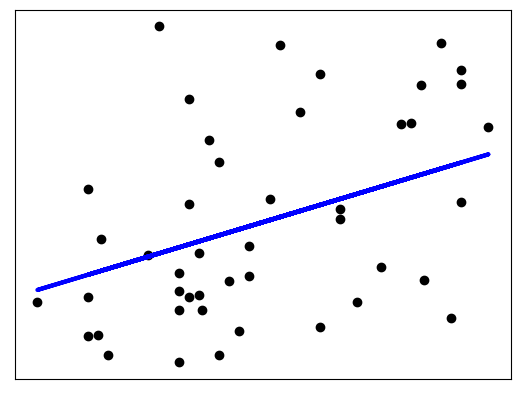

In [13]:
## If only one feature selected to train the model, visualize the fitted line after training ##

if N_s == 1:
    # Plot outputs
    plt.scatter(diabetes_X_test[:,selected_features], diabetes_y_test, color="black")
    plt.plot(diabetes_X_test[:,selected_features], diabetes_y_pred, color="blue", linewidth=3)

    plt.xticks(())
    plt.yticks(())

    plt.show()

### Now try to find a subset of features to train the model so that it can outperform the model trained by all features. Through above steps, you should have some ideas about  how to choose features for a linear model.

In [14]:
## You can reuse above code and just record your results here ##

## best subset of features: []
## Mean squared error:
## Mean absolute error:
## Coefficient of determination: 


## Task 2: Linear Classification

This task aims to train one or more linear classification models using [Breast cancer dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset). Please click to see descriptive information about this dataset. We will provide instructions and example code step by step for you.

In [15]:
# Load the breast cancer dataset
bcancer = datasets.load_breast_cancer()
bcancer_X, bcancer_y = bcancer.data, bcancer.target

In [16]:
## Split training and test set first ##
## The same function used in task 1 to split the training and test set ##
bcancer_X_train, bcancer_X_test, bcancer_y_train, bcancer_y_test = train_test_split(
    bcancer_X, bcancer_y, test_size=0.1, random_state=42
)


### Step 1: Now try to visualize the features first before training a classifier

   


In [17]:
## Input your own visualiztion code here ##








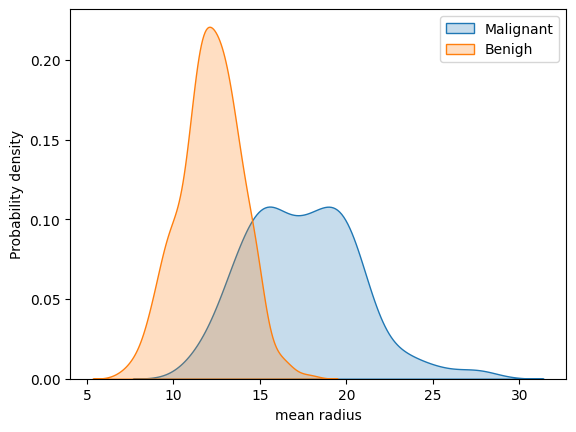

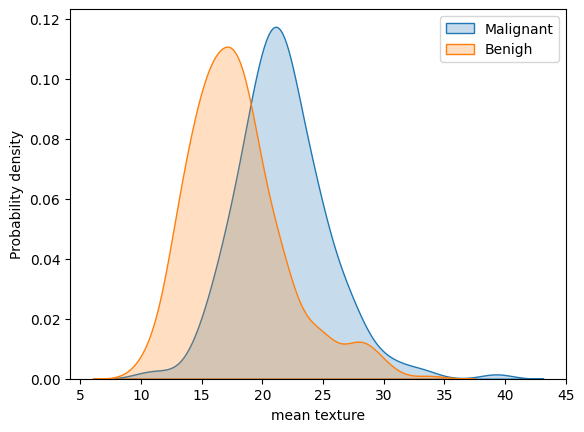

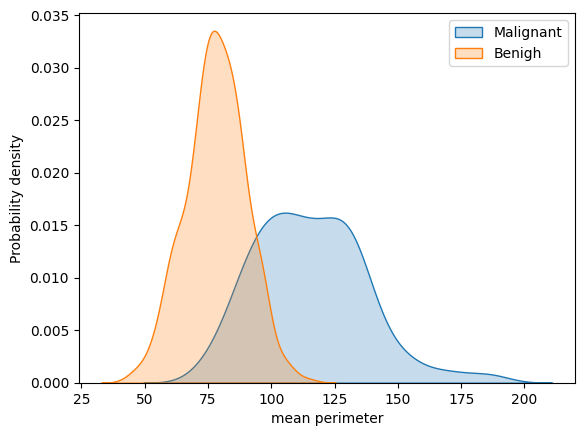

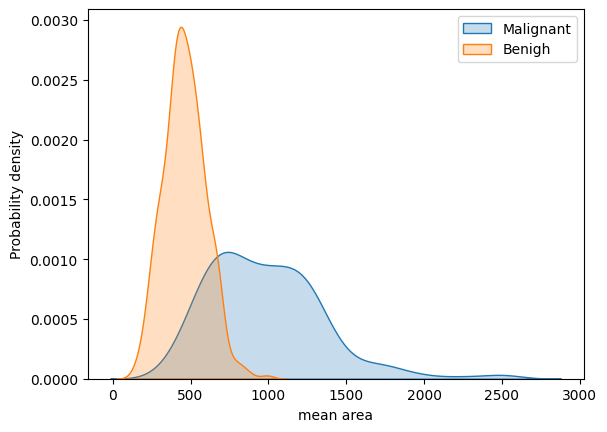

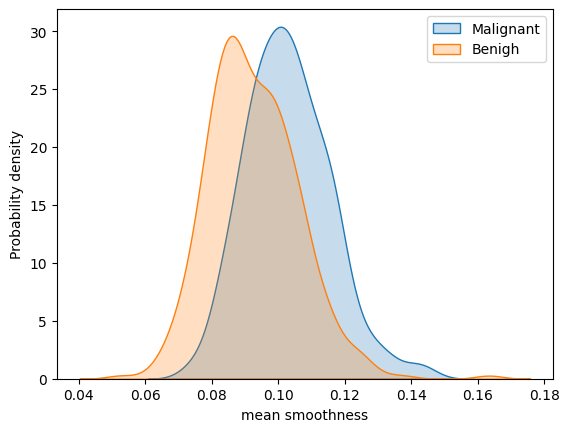

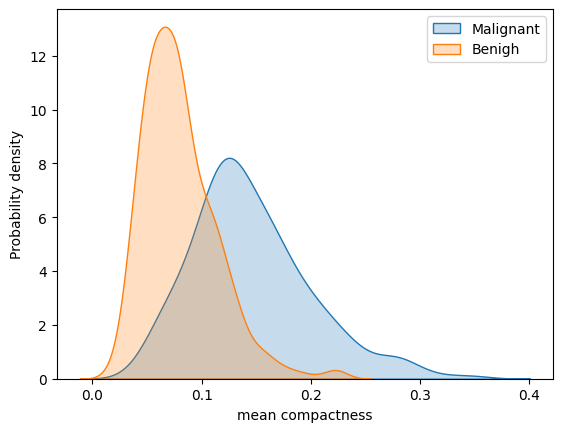

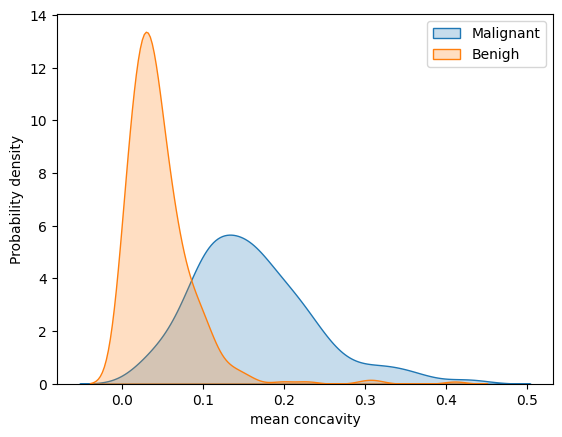

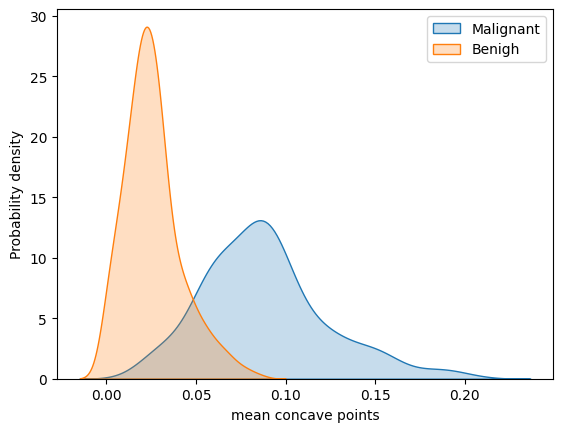

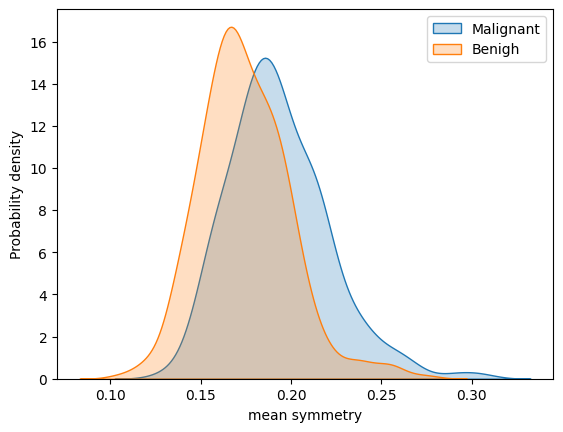

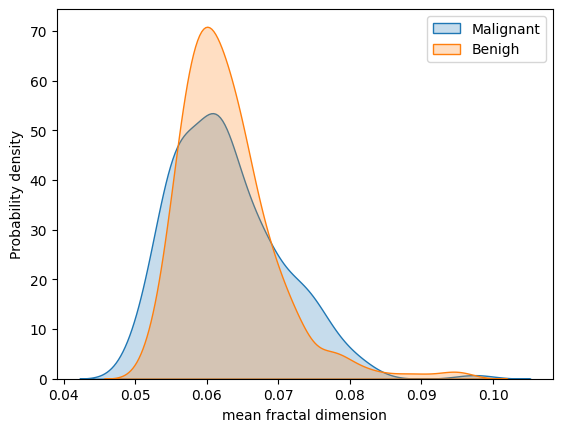

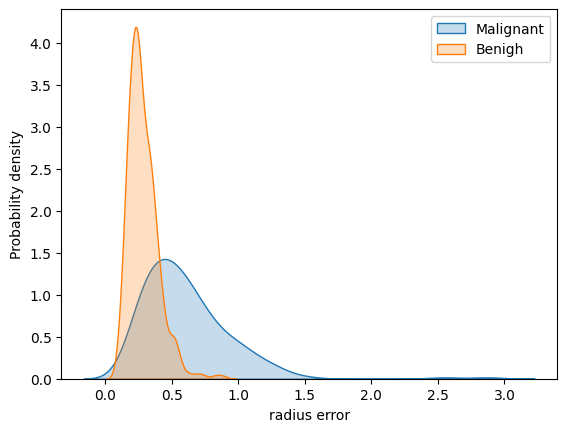

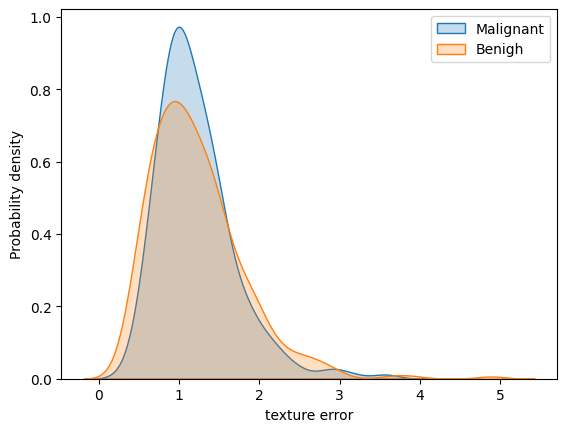

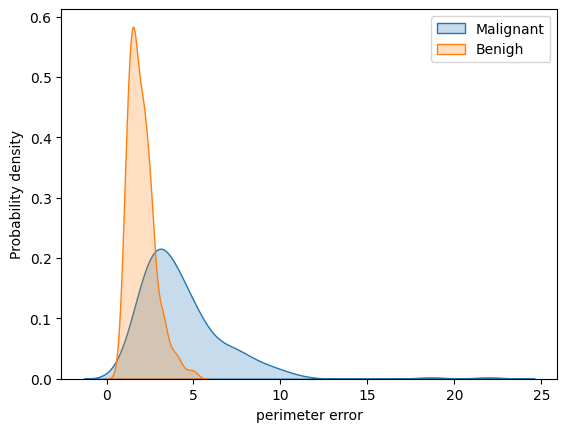

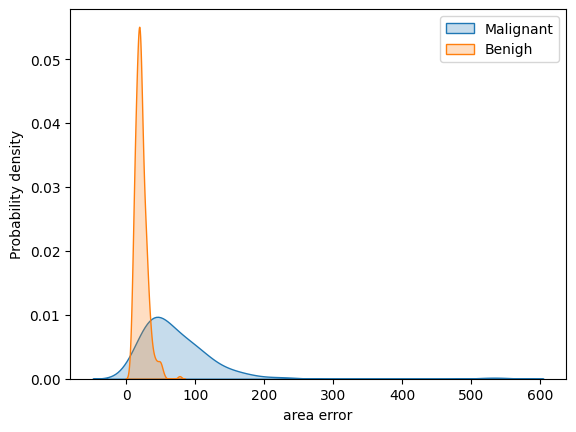

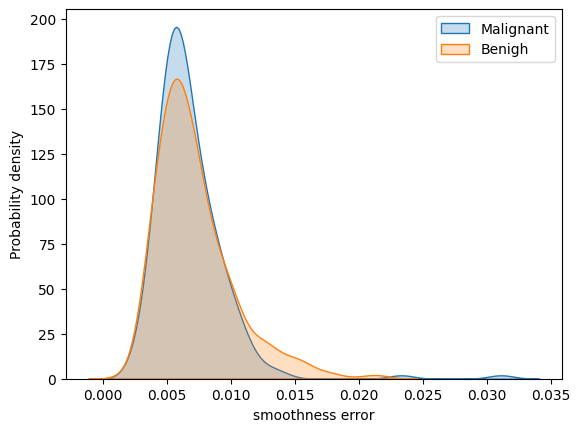

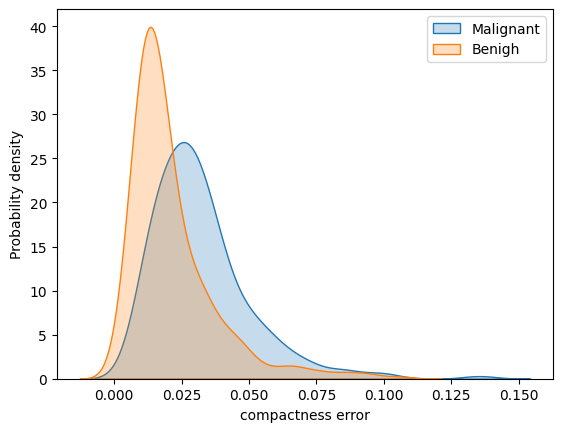

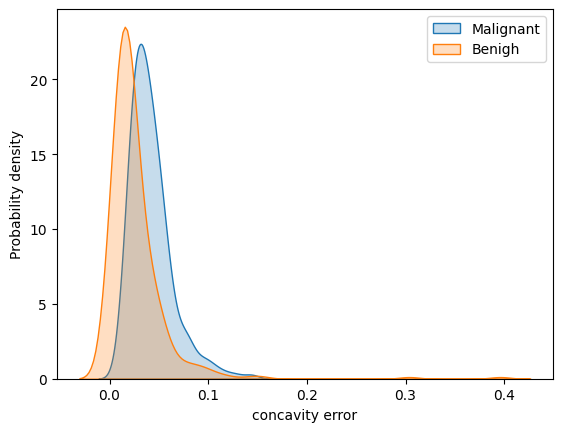

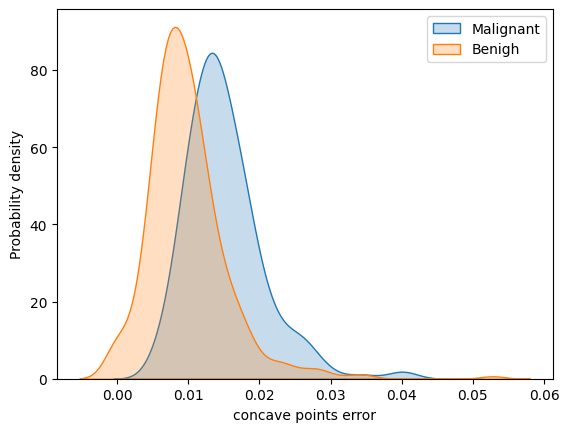

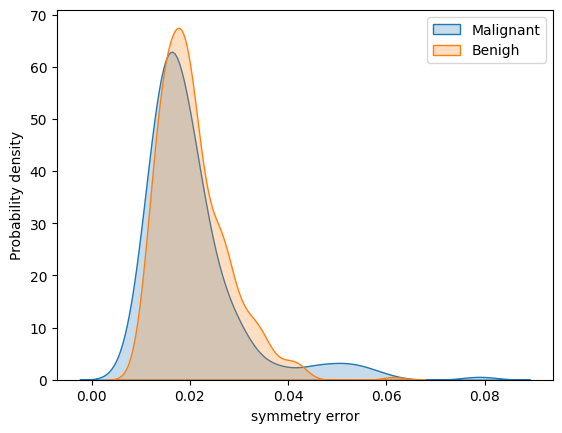

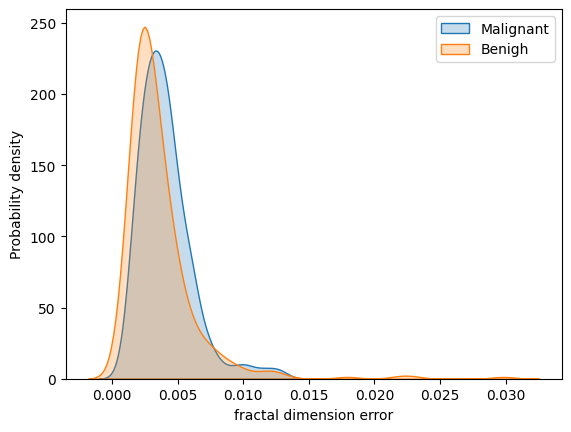

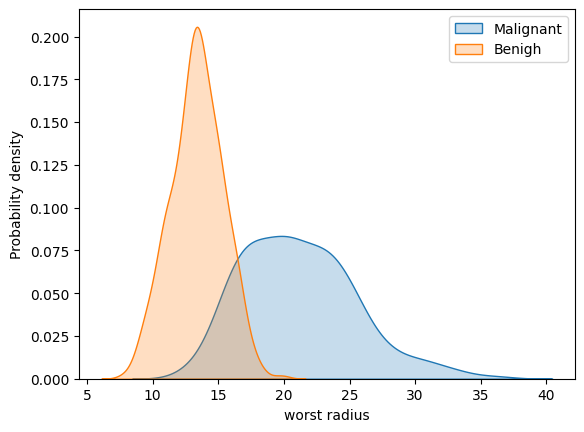

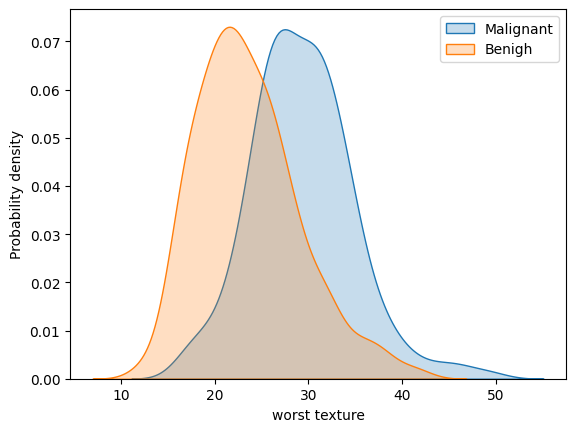

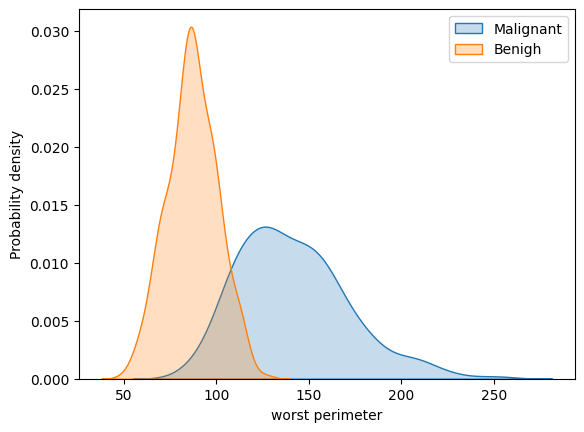

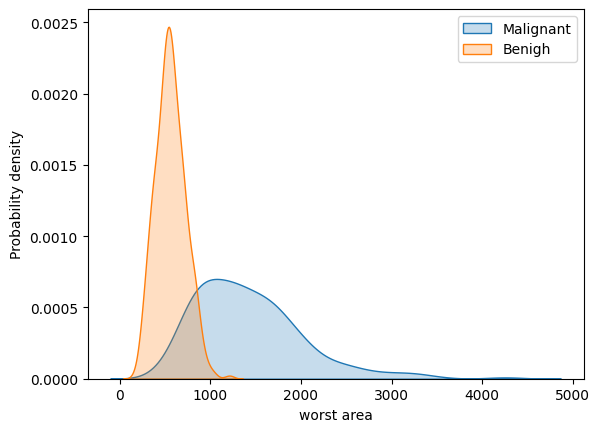

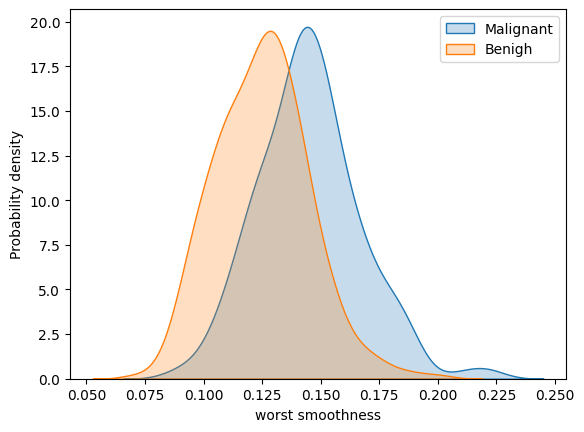

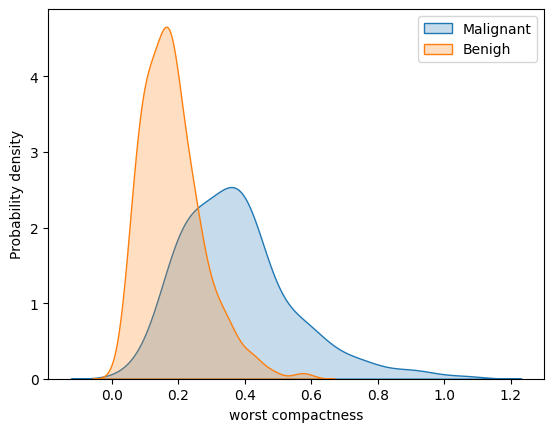

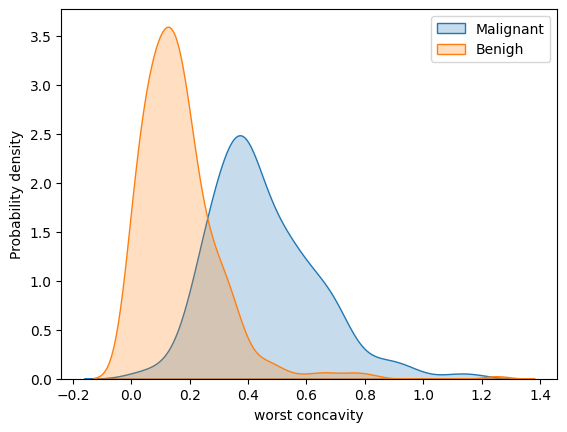

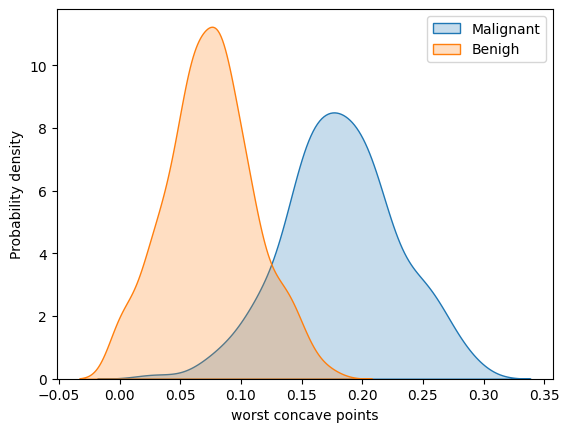

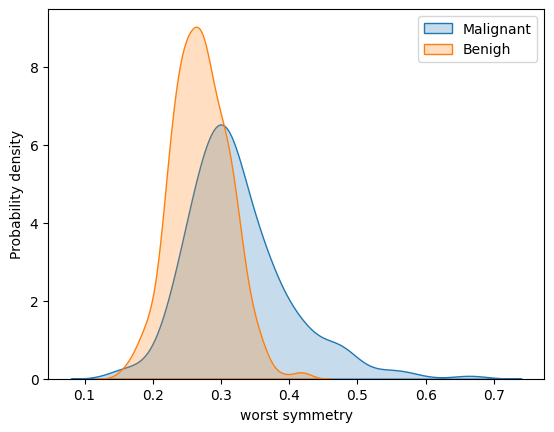

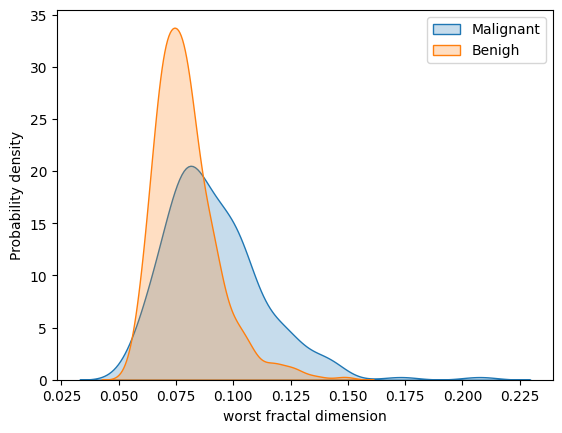

In [18]:
## You can also uncomment the example code to see an visualization example ##

## This example code display estimated distributions of each feature in each class ##

for i in range(bcancer_X.shape[1]):
    sns.kdeplot(bcancer_X[bcancer_y==0,i],fill=True)
    sns.kdeplot(bcancer_X[bcancer_y==1,i],fill=True)

    plt.legend(['Malignant','Benigh'])
    plt.xlabel(bcancer.feature_names[i])
    plt.ylabel('Probability density')
    plt.show()
    plt.close()
   

### Step 2: Train a linear classifier using TWO selected features and plot decision boundaries learned by the model. More information of linear models implemented in scikit-learn can be found [here](https://scikit-learn.org/stable/modules/classes.html?highlight=linear+model#module-sklearn.linear_model).

In [19]:
## Select two features to train, change the feature index here to see different effectiveness between features ##
selected_features = [0,1] 

## Create a classifier and fit it by the training data ##
classifier = linear_model.LogisticRegression(penalty='none',solver='lbfgs').fit(bcancer_X_train[:,selected_features], bcancer_y_train)

In [20]:
## Create some other linear model here to replace the above one, such as SGDClassifier, RidgeClassifier ##




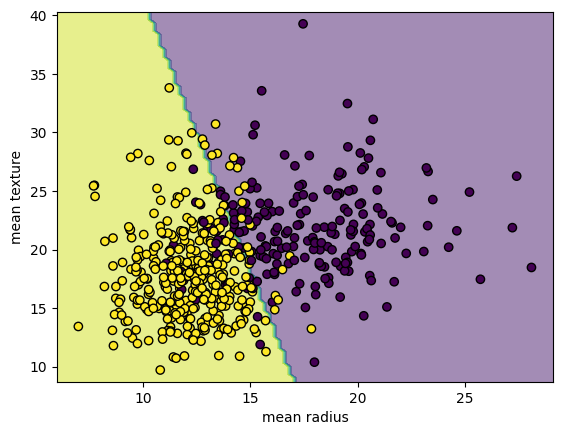

In [21]:
## Plot decision boundaries in the 2D-dimension feature map ##
disp = DecisionBoundaryDisplay.from_estimator(
     classifier, bcancer_X[:,selected_features], response_method="predict",
     xlabel=bcancer.feature_names[selected_features[0]], ylabel=bcancer.feature_names[selected_features[1]],
     alpha=0.5,
 )
disp.ax_.scatter(bcancer_X[:,selected_features[0]], bcancer_X[:,selected_features[1]], c=bcancer_y, edgecolor="k")

In [22]:
## Evaluate classifier on test set ##
print('coeficients: {}'.format(np.round(classifier.coef_,3)))
accuracy = classifier.score(bcancer_X_test[:,selected_features], bcancer_y_test)
print('accuracy %.3f' % accuracy)

coeficients: [[-1.019 -0.219]]
accuracy 0.947


### Step 3: Now add regularization to the classifier (see the example code below), and repeat step 2 to see how regularization works on the decision boundaries,  coeficients, and what's the effect on the testing performance. The options of regularization criteria of each type of classifier can be found in their scikit learn webpage, e.g.  details of [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression).


In [23]:
## Example code of specifying regularization for the classifier ##
#classifier = linear_model.LogisticRegression(penalty='l2',solver='lbfgs').fit(bcancer_X_train[:,selected_features], bcancer_y_train)
#classifier = linear_model.LogisticRegression(penalty='l1',solver='liblinear').fit(bcancer_X_train[:,selected_features], bcancer_y_train)

### Step 4: Change the test size to a larger portion (in the second cell under task 2) and repeat step 3. The regularization may not do good to the model performance when the training set is small, it may cause underfitting of the data.

In [24]:
## Record your results of different settings here ##





### Step 5: Summarize  the key ideas that you have learned about linear models

In [25]:
## What are important factors for training a linear model on regression or classification tasks? ##








